# Evaluation

## 1. Classification

In [17]:
import tensorflow as tf
model = tf.keras.models.load_model('../models/classification.keras')

In [18]:
DATA_DIR = '../data/archive/v_2/'
BATCH_SIZE = 32
EPOCHS = 50
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [19]:
data = tf.keras.utils.image_dataset_from_directory(
  DATA_DIR,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE
)
data = data.map(lambda images, labels: (images/255, labels))

Found 16000 files belonging to 4 classes.


In [20]:
import os
class_names = os.listdir(DATA_DIR)
n_classes = len(class_names)

In [21]:
train_size = int(len(data)*.7)
validation_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

train = data.take(train_size)
validation = data.skip(train_size).take(validation_size)
test = data.skip(train_size+validation_size).take(test_size)

In [22]:
import numpy as np
predictions = model.predict(test)  # Returns softmax probabilities
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.concatenate([y.numpy() for x, y in test], axis=0)

49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step


In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(true_classes, predicted_classes)
print(accuracy)

0.24298469387755103


In [24]:
print(classification_report(true_classes, predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

        agri       0.22      0.27      0.24       378
  barrenland       0.25      0.26      0.26       420
   grassland       0.24      0.23      0.23       389
       urban       0.27      0.21      0.24       381

    accuracy                           0.24      1568
   macro avg       0.25      0.24      0.24      1568
weighted avg       0.25      0.24      0.24      1568



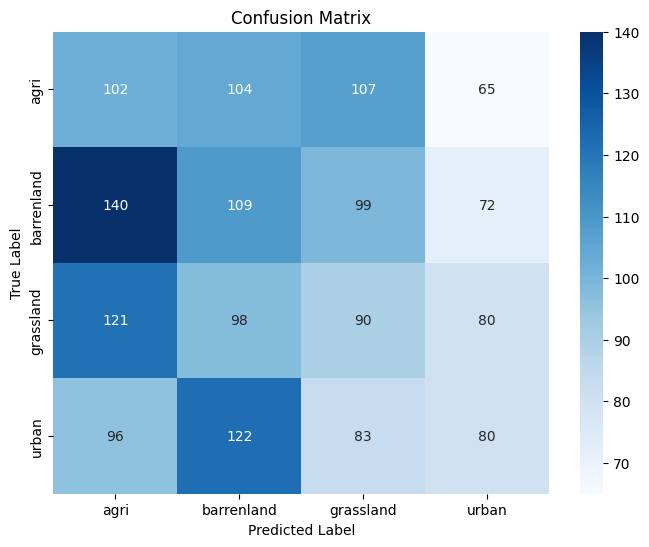

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()